In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

Dataset Description
Вам предоставлены данные об отзывах ресторанам Санкт-Петербурга и Москвы. Каждая строчка датасета содержит идентификаторы пользователя, ресторана, количество прошедших с 2018 года дней (ts), средний чек заведения и другие параметры ресторана

Вам предлагается предсказать рейтинг ресторана, используя непараметрическую регрессию из python пакета sklearn. Использовать другие модели при решении нельзя

Обученную на train модель примените к датасету test_x, чтобы предсказать рейтинг ресторанов из test_x. Предсказание запишите в файл в указанном ниже формате

В файле-решении должно быть 2 колонки: идентификатор (kaggle требует его наличие) строки и предсказание модели

In [2]:
sample_submission_df = pd.read_csv('data\\sample_submission.csv')

sample_submission_df

,id,rating_org
0,0,1.872971
1,1,4.695246
2,2,4.862877
3,3,0.579169
4,4,3.941410
...,...,...
24660,24660,3.802087
24661,24661,1.099415
24662,24662,4.380465
24663,24663,3.158071


In [3]:
df_test = pd.read_csv('data\\test_x.csv')

df_test

,user_id,org_id,rating,ts,user_city,org_city,average_bill,rubrics,food_delivery,breakfast,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,7016090648418898986,17145242605301041786,5.0,754,spb,spb,1000.0,Ресторан,1,1,...,0,0,0,0,0,0,0,0,0,0
1,7984587338632361094,6994879043376924376,5.0,99,spb,spb,1500.0,Ресторан,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12147560281443849509,5596242631024337097,5.0,1174,spb,spb,500.0,Кафе,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9761706959109988045,16272893617101942587,5.0,1176,msk,msk,500.0,Кафе,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5657837819564452133,3193067678075550767,4.0,1030,msk,msk,NaN,Кафе,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24660,18358457644115345255,17532855088852596891,5.0,486,msk,msk,NaN,Ресторан,1,0,...,0,0,0,0,0,0,0,0,0,0
24661,17543062615122951822,7034326954454250932,5.0,773,msk,msk,NaN,Кафе,0,0,...,0,0,0,0,0,0,0,0,0,0
24662,1658949472261795605,14594426439384070672,1.0,793,msk,msk,1000.0,"Бар, паб",1,1,...,0,0,1,0,0,0,0,0,0,0
24663,18236897116718094922,10562954877317343611,5.0,722,msk,msk,1000.0,"Бар, паб",1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train_all = pd.read_csv('data\\train.csv')

df_train_all

,user_id,org_id,rating,ts,user_city,org_city,average_bill,rating_org,rubrics,food_delivery,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,12182789761588196310,11946401375069641937,4.0,677,msk,msk,1500.0,3.883212,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
1,2796544982129273287,5545859981678495568,5.0,577,msk,msk,1000.0,4.495379,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
2,10546824832088319728,3451485117888180206,4.0,716,msk,msk,500.0,4.576063,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
3,9967742981458207920,9490041040735762889,3.0,639,spb,spb,1000.0,3.775701,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
4,11046819495825038093,5234254278902729372,5.0,669,msk,msk,500.0,4.187500,Пиццерия,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73990,12526944272743210441,2948132663120061820,2.0,517,msk,msk,500.0,4.280632,"Булочная, пекарня",1,...,0,0,0,0,0,0,0,0,0,0
73991,17792383534781948527,13225228120465186798,5.0,455,msk,msk,NaN,4.446033,Ресторан,0,...,0,0,0,0,0,0,0,0,0,0
73992,7452326377200652192,1135274990644701922,5.0,1032,msk,msk,1000.0,4.420231,"Бар, паб",1,...,0,0,0,0,0,0,0,0,0,0
73993,368322320223775667,2498968754330575170,5.0,27,msk,msk,NaN,4.694307,Кафе,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import minmax_scale


def dropUnusableColumns(curr_df):
    place_type_list = curr_df["rubrics"].unique()
    city_type_list = curr_df["org_city"].unique()
    place_type_dict = {k: v for v, k in enumerate(place_type_list)}
    city_type_dict = {k: v for v, k in enumerate(city_type_list)}

    out_def_df_numb = curr_df.select_dtypes(exclude=['object'])
    out_def_df_obj = curr_df.select_dtypes(include=['object'])
    out_def_df_numb["average_bill"] = out_def_df_numb["average_bill"].fillna(out_def_df_numb["average_bill"].mean())
    #out_def_df_numb["org_id"] = minmax_scale(out_def_df_numb["org_id"], feature_range=(0, len(out_def_df_numb["org_id"].unique())))

    mean_rating = pd.DataFrame.from_records(out_def_df_numb, columns=["org_id", "rating"])
    mean_rating = mean_rating.groupby(["org_id"])["rating"].mean()

    fsci = out_def_df_numb.columns.get_loc("food_delivery")
    out_def_df_numb["sum_info"] = out_def_df_numb.values[:, fsci:].sum(axis=1)
    out_def_df_numb["rubrics_id"] = out_def_df_obj["rubrics"].apply(lambda x: place_type_dict[str(x)])
    out_def_df_numb["org_city_id"] = out_def_df_obj["org_city"].apply(lambda x: city_type_dict[str(x)])
    out_def_df_numb["org_city_id"] = out_def_df_obj["org_city"].apply(lambda x: city_type_dict[str(x)])
    out_def_df_numb["mean_org_rating"] = out_def_df_numb["org_id"].apply(lambda x: mean_rating[x])

    return_columns = ["user_id", "org_id", 'rating', "ts", "average_bill", "sum_info", "rubrics_id",
                      "org_city_id", "mean_org_rating"]

    return pd.DataFrame.from_records(out_def_df_numb, columns=return_columns)

In [6]:
df_test_result = df_train_all.rating_org
df_test_columns = dropUnusableColumns(df_train_all.drop('rating_org', axis=1))
df_test_columns

,user_id,org_id,rating,ts,average_bill,sum_info,rubrics_id,org_city_id,mean_org_rating
0,12182789761588196310,11946401375069641937,4.0,677,1500.000000,8.0,0,0,4.333333
1,2796544982129273287,5545859981678495568,5.0,577,1000.000000,16.0,0,0,4.363636
2,10546824832088319728,3451485117888180206,4.0,716,500.000000,13.0,1,0,4.772727
3,9967742981458207920,9490041040735762889,3.0,639,1000.000000,13.0,1,1,4.000000
4,11046819495825038093,5234254278902729372,5.0,669,500.000000,18.0,2,0,4.230769
...,...,...,...,...,...,...,...,...,...
73990,12526944272743210441,2948132663120061820,2.0,517,500.000000,9.0,7,0,4.428571
73991,17792383534781948527,13225228120465186798,5.0,455,1075.891973,3.0,0,0,4.406780
73992,7452326377200652192,1135274990644701922,5.0,1032,1000.000000,17.0,4,0,4.705882
73993,368322320223775667,2498968754330575170,5.0,27,1075.891973,1.0,1,0,4.700000


In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15000, n_jobs=-1)
knn.fit(df_test_columns, df_test_result)
df_test_columns

,user_id,org_id,rating,ts,average_bill,sum_info,rubrics_id,org_city_id,mean_org_rating
0,12182789761588196310,11946401375069641937,4.0,677,1500.000000,8.0,0,0,4.333333
1,2796544982129273287,5545859981678495568,5.0,577,1000.000000,16.0,0,0,4.363636
2,10546824832088319728,3451485117888180206,4.0,716,500.000000,13.0,1,0,4.772727
3,9967742981458207920,9490041040735762889,3.0,639,1000.000000,13.0,1,1,4.000000
4,11046819495825038093,5234254278902729372,5.0,669,500.000000,18.0,2,0,4.230769
...,...,...,...,...,...,...,...,...,...
73990,12526944272743210441,2948132663120061820,2.0,517,500.000000,9.0,7,0,4.428571
73991,17792383534781948527,13225228120465186798,5.0,455,1075.891973,3.0,0,0,4.406780
73992,7452326377200652192,1135274990644701922,5.0,1032,1000.000000,17.0,4,0,4.705882
73993,368322320223775667,2498968754330575170,5.0,27,1075.891973,1.0,1,0,4.700000


In [18]:
lab3_res_array = knn.predict(dropUnusableColumns(df_test))
lab3_res_df = pd.DataFrame(lab3_res_array, columns=['rating_org'])
lab3_res_df.index.names = ["id"]
lab3_res_df.to_csv("res/res_.csv")

70% test

In [9]:

from sklearn.metrics import mean_absolute_percentage_error

PROC_VALUE = 0.7
PROC_NUMBER = int(len(df_train_all) * PROC_VALUE)
print(PROC_NUMBER)
df_test_train_cut = df_train_all.rating_org[:PROC_NUMBER]
df_test_columns_cut = dropUnusableColumns(df_train_all.drop('rating_org', axis=1))[:PROC_NUMBER]

knn_small = KNeighborsRegressor()
knn_small.fit(df_test_columns_cut, df_test_train_cut)
knn_result_cut_fit = knn_small.predict(dropUnusableColumns(df_train_all[PROC_NUMBER:].drop('rating_org', axis=1)))
knn_result_cut_real = df_train_all[PROC_NUMBER:].rating_org

mean_absolute_percentage_error(knn_result_cut_real, knn_result_cut_fit)

51796


0.05833663922221268

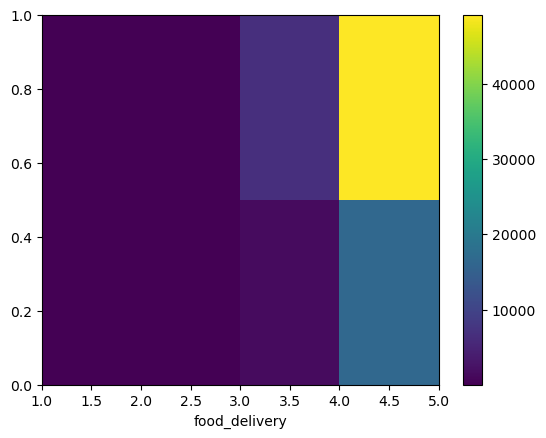

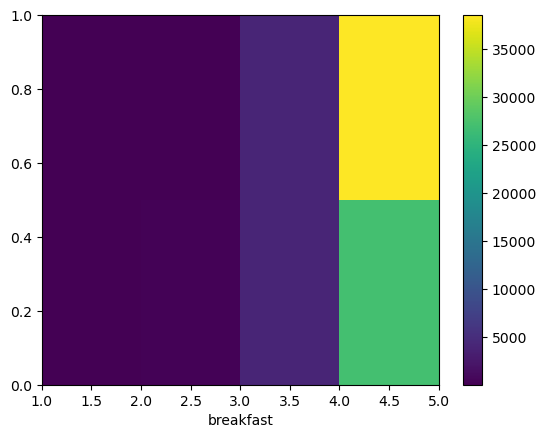

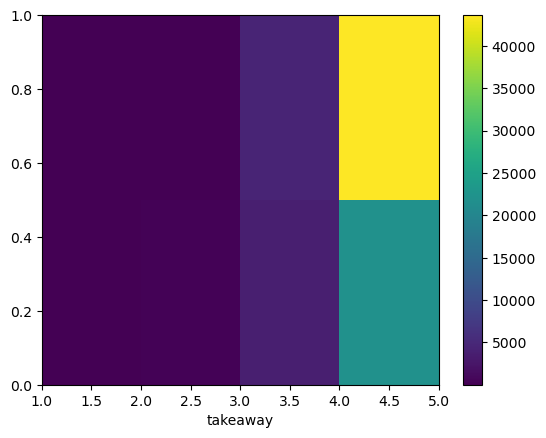

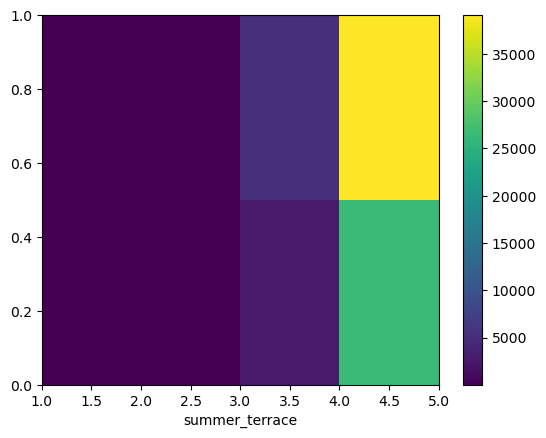

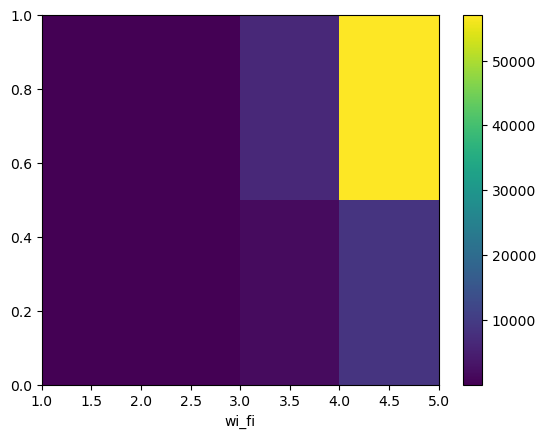

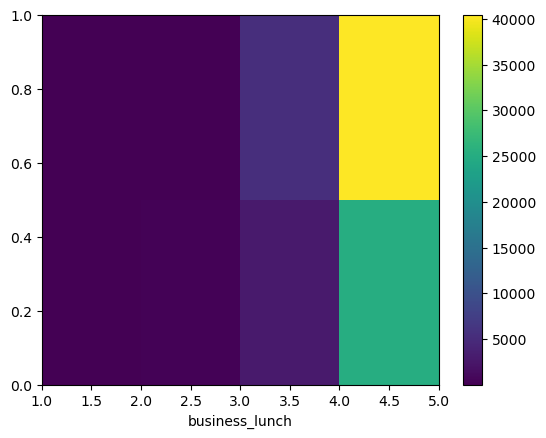

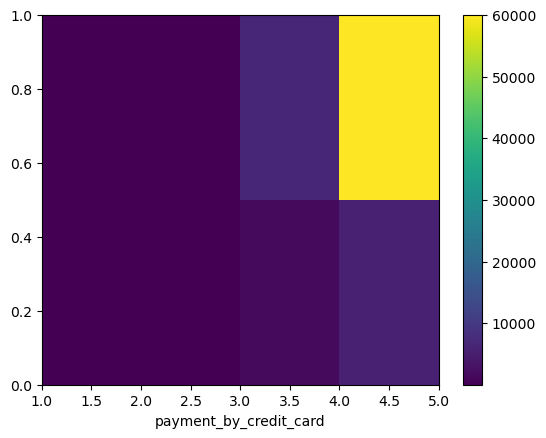

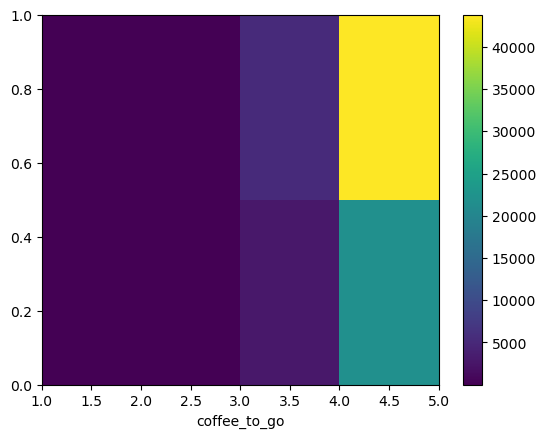

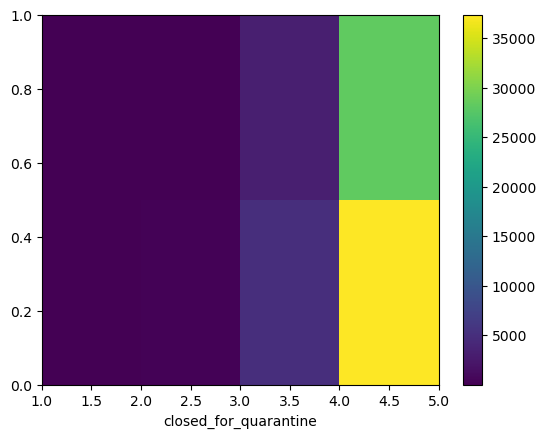

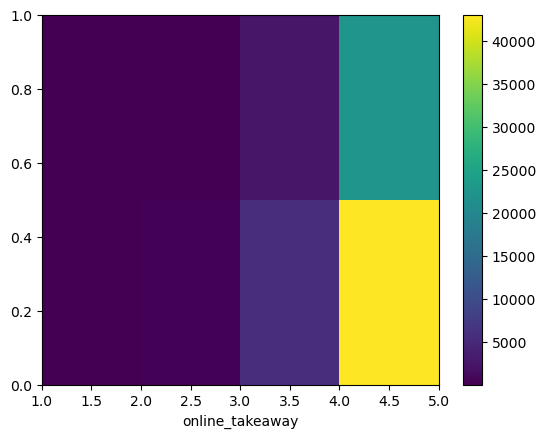

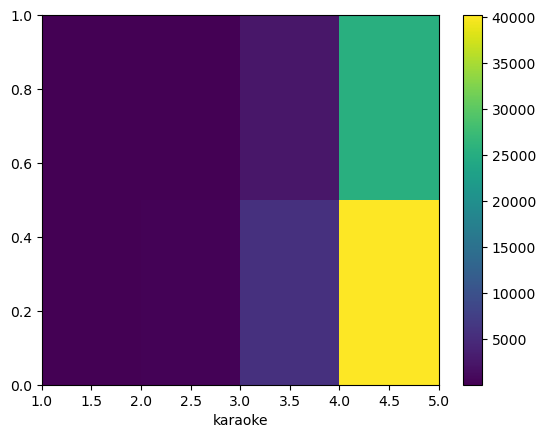

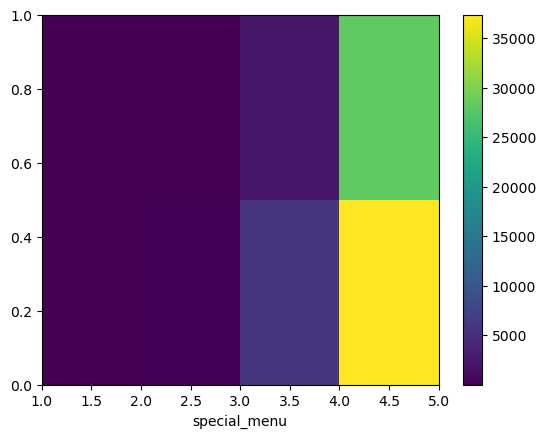

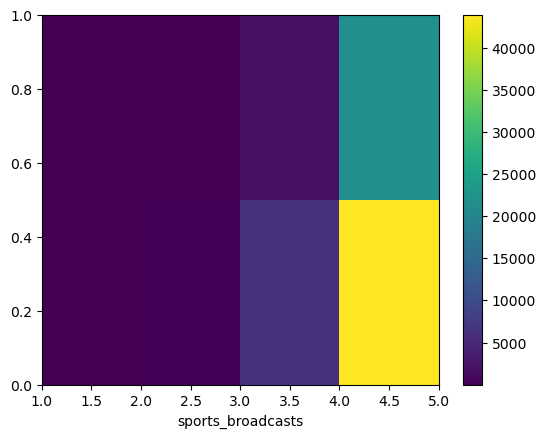

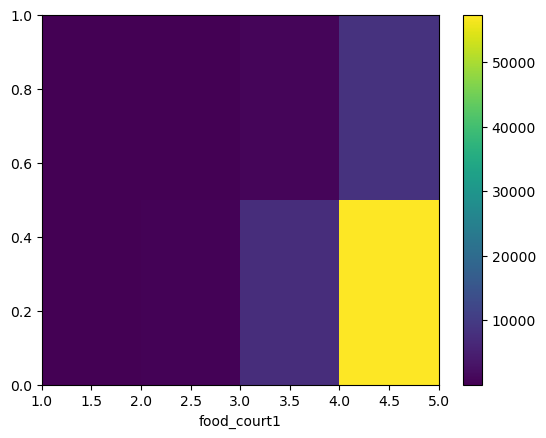

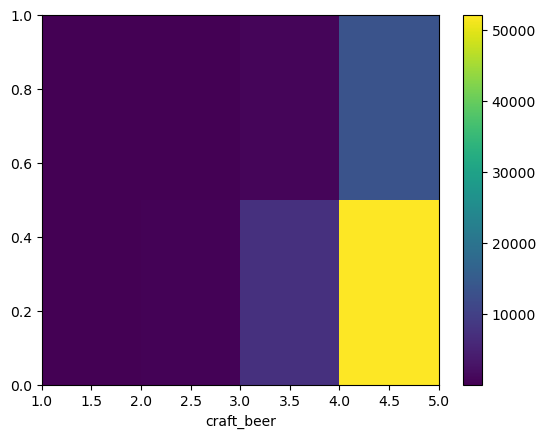

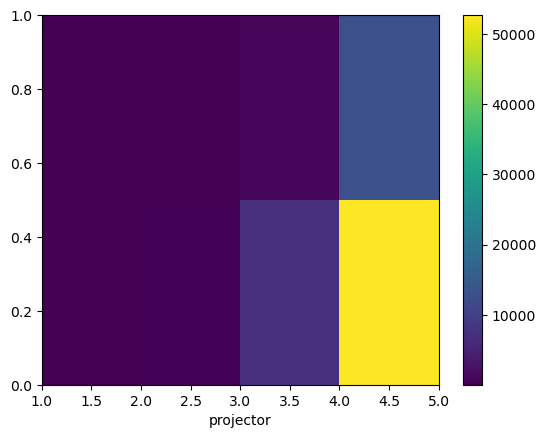

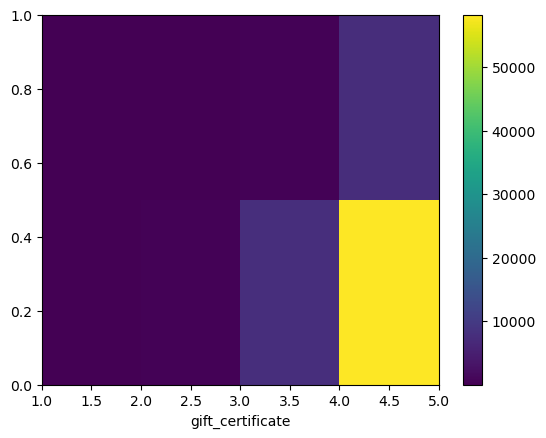

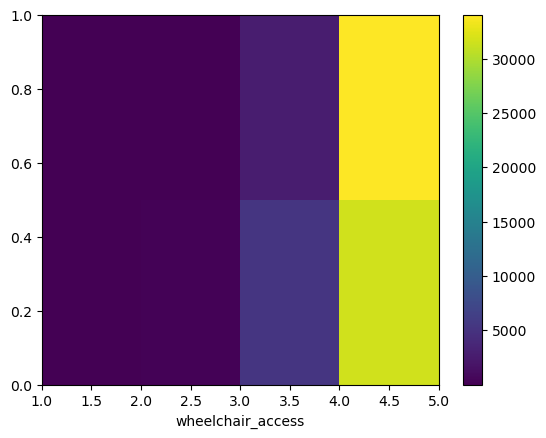

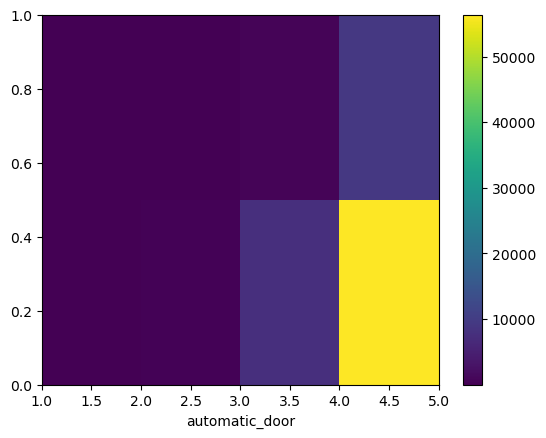

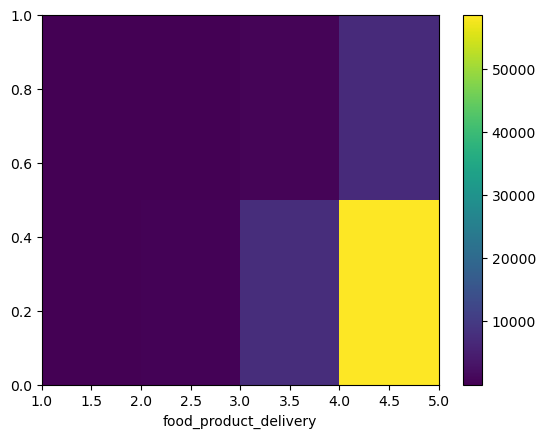

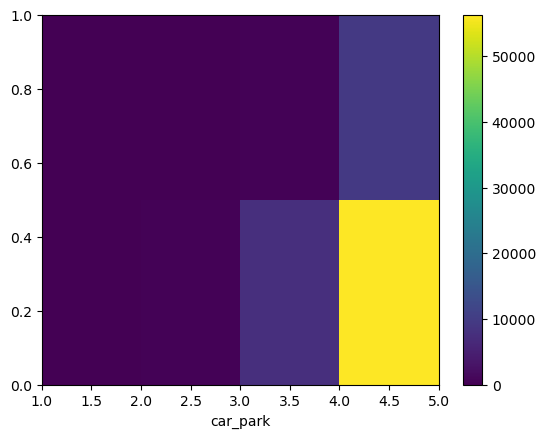

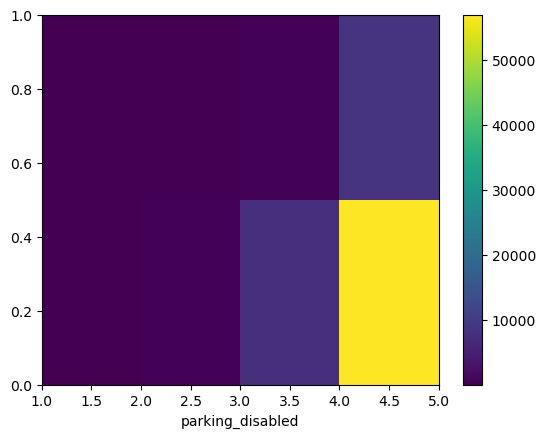

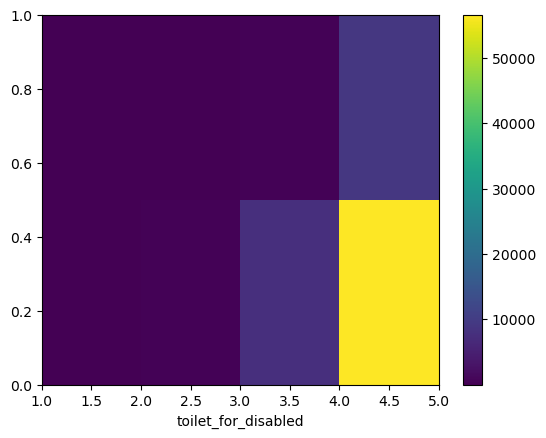

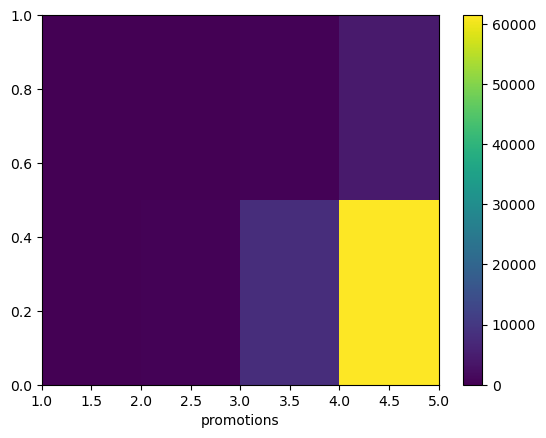

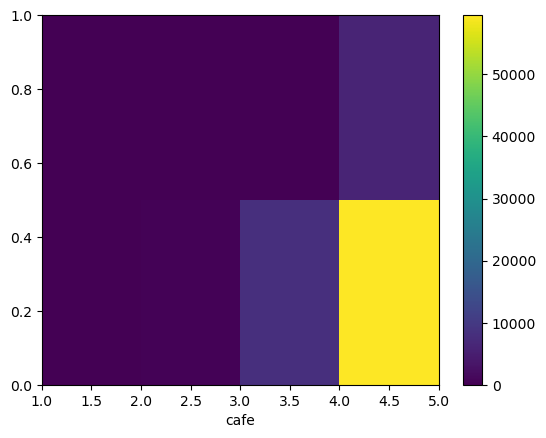

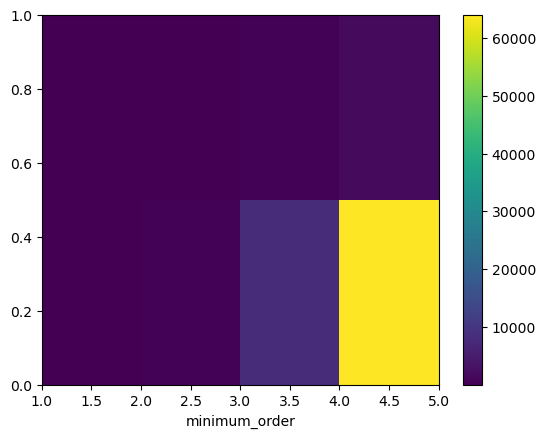

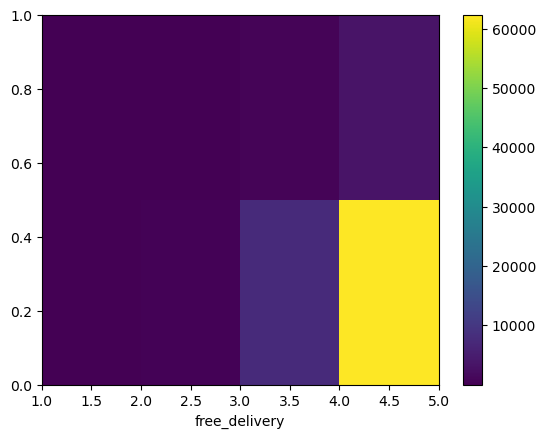

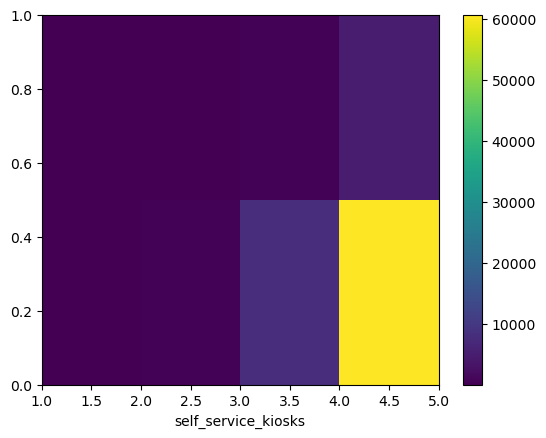

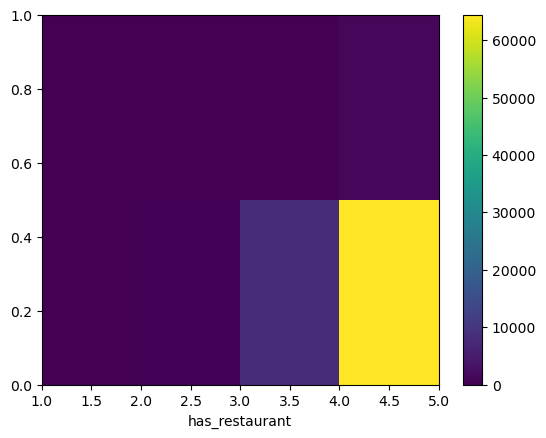

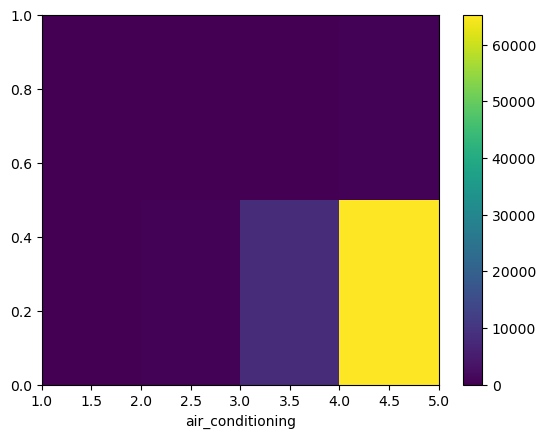

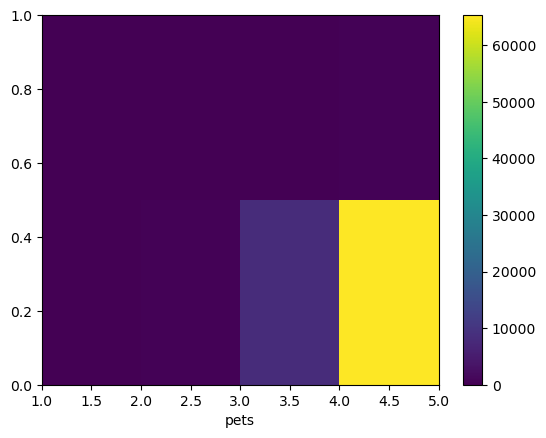

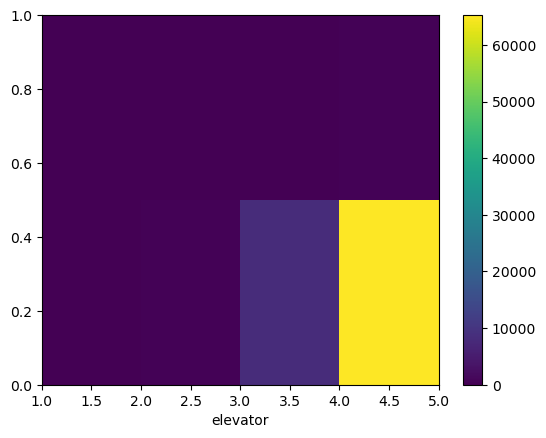

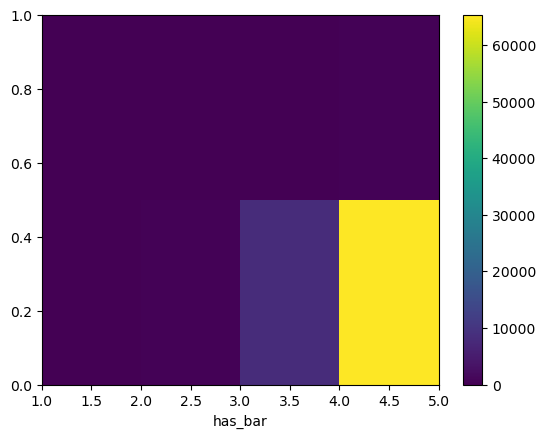

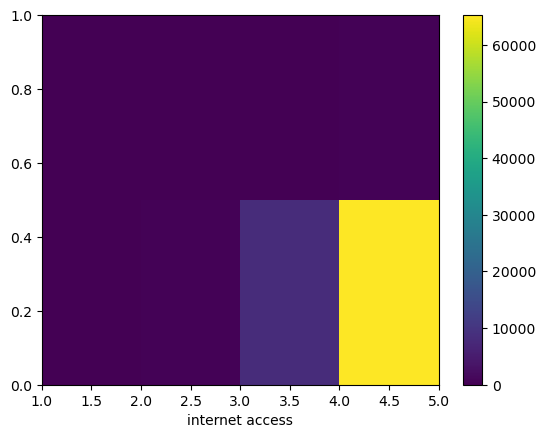

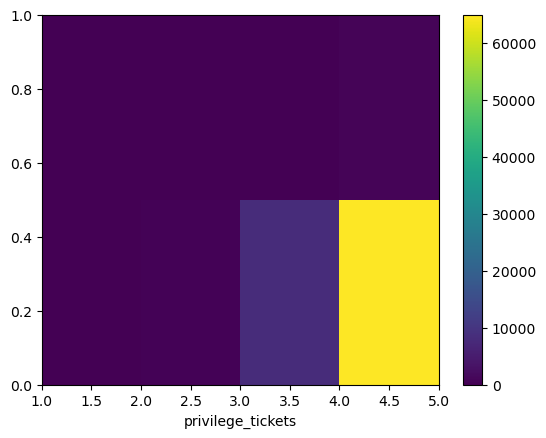

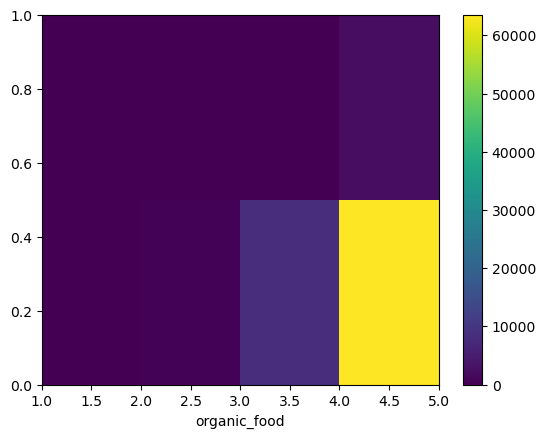

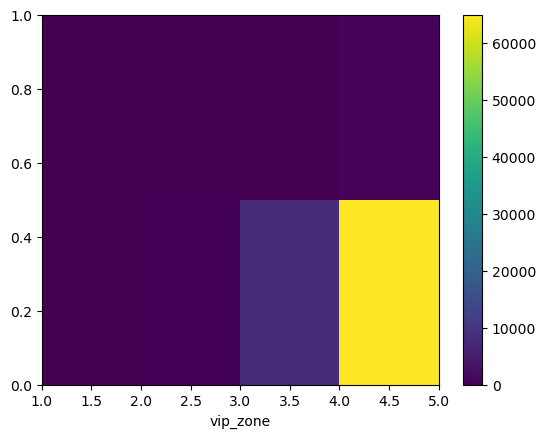

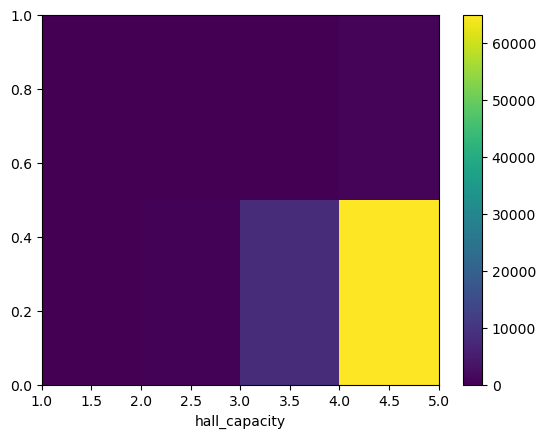

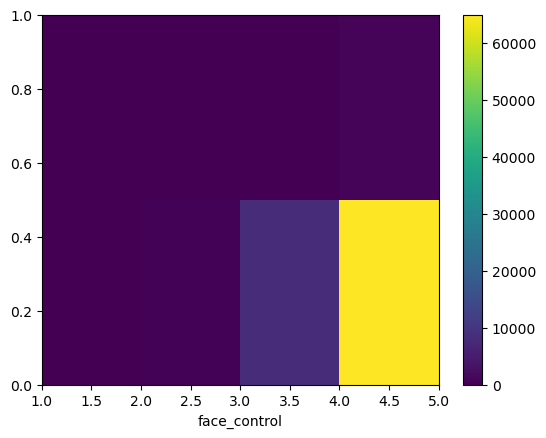

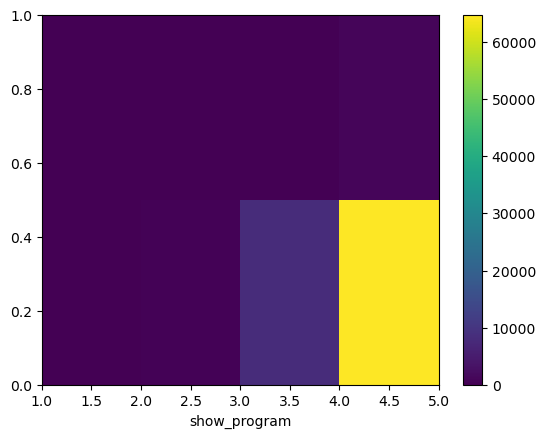

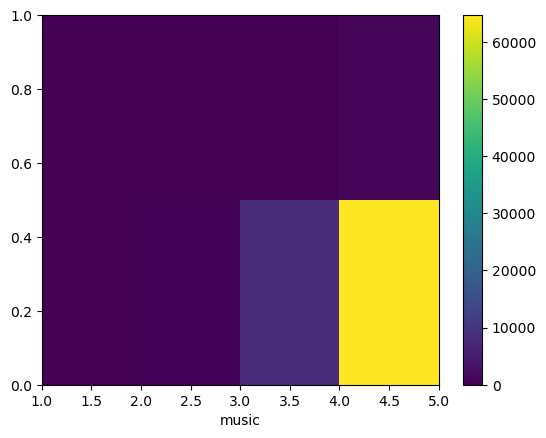

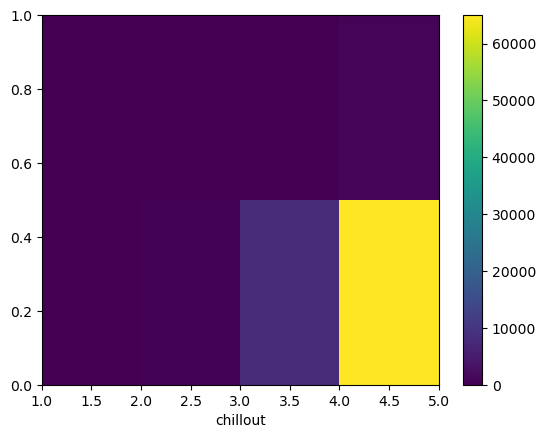

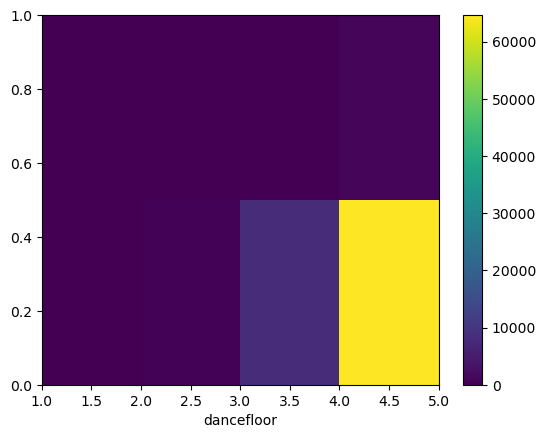

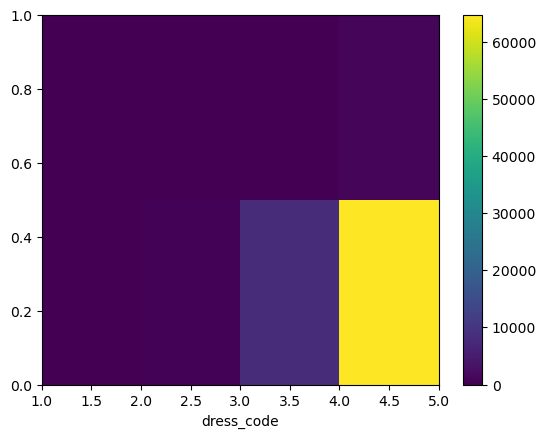

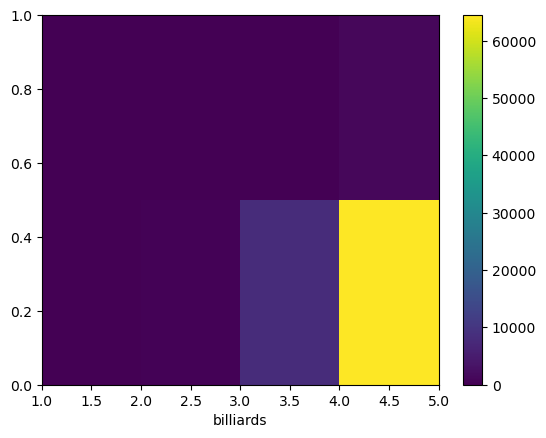

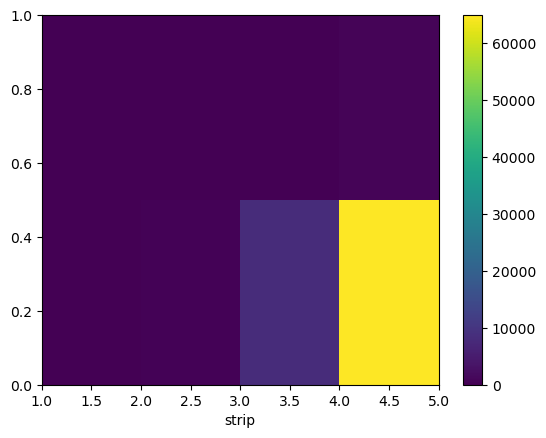

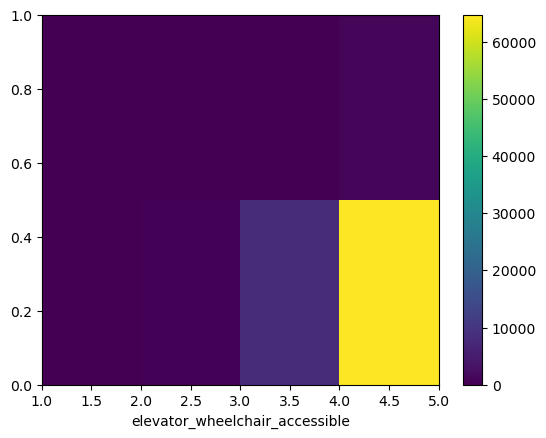

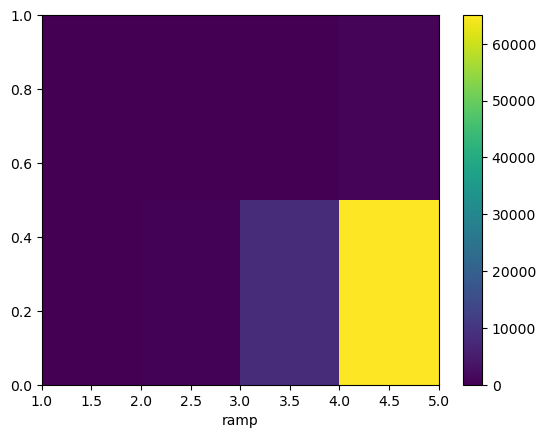

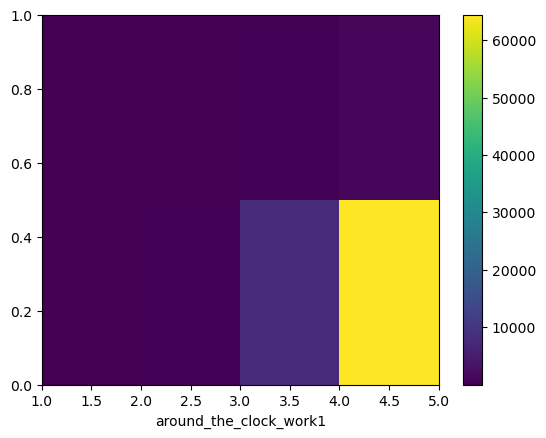

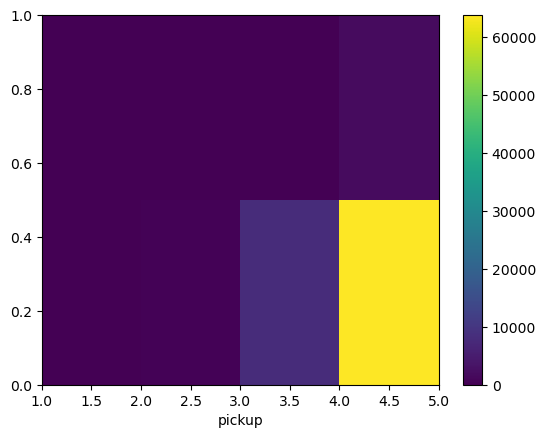

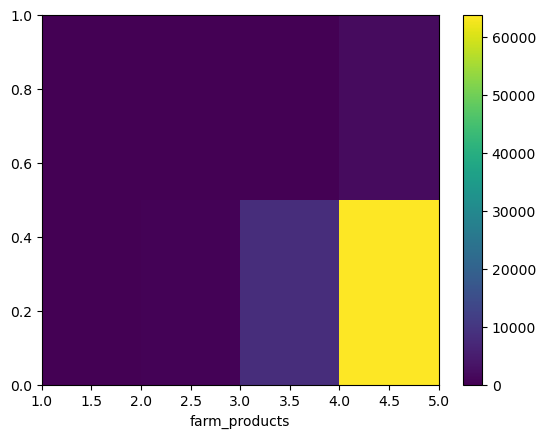

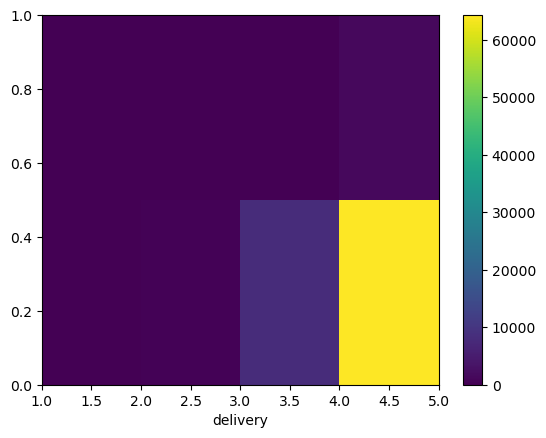

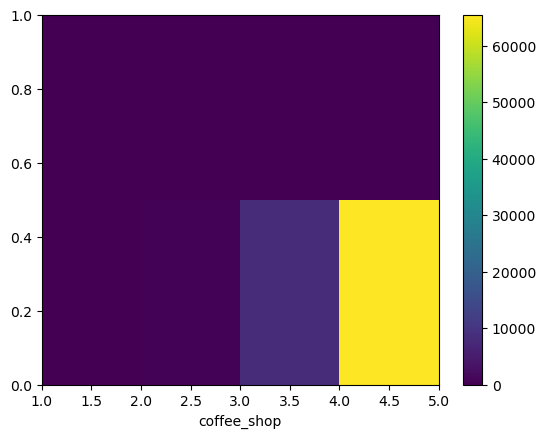

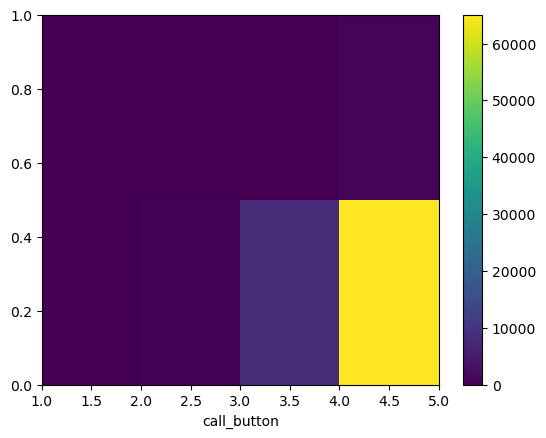

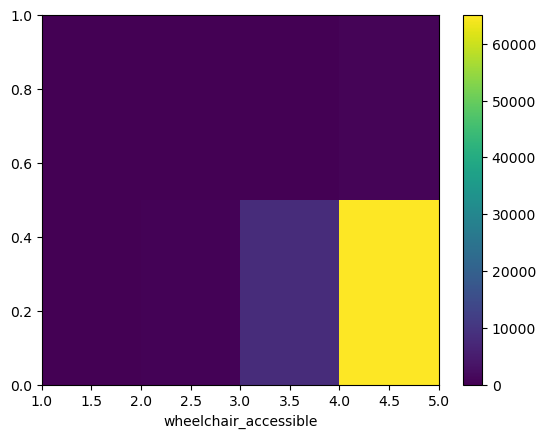

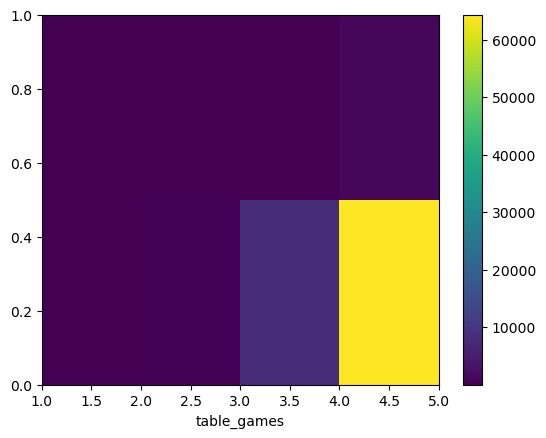

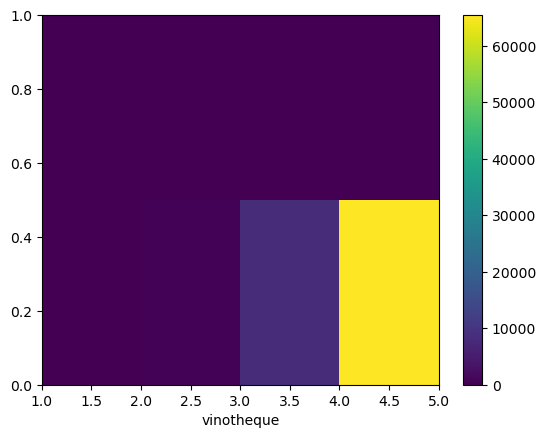

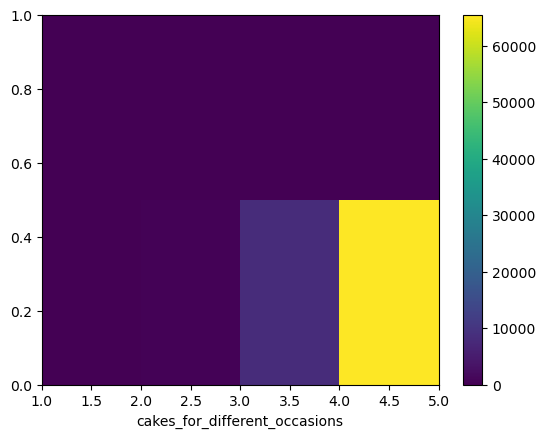

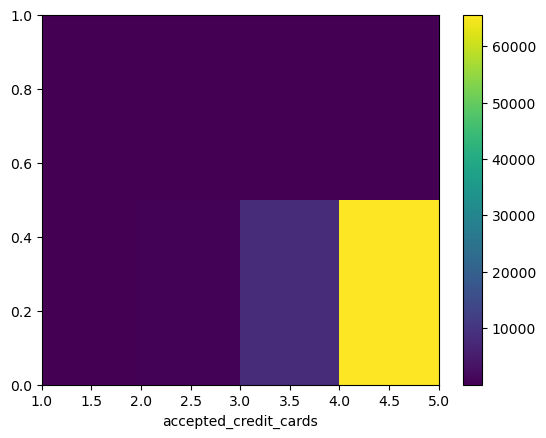

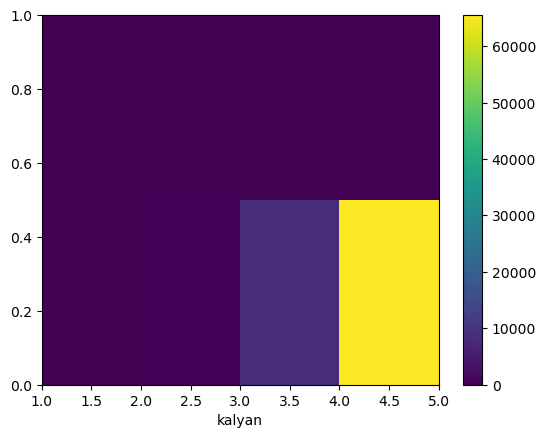

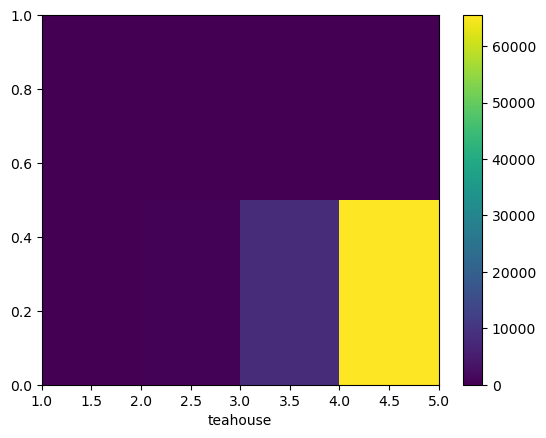

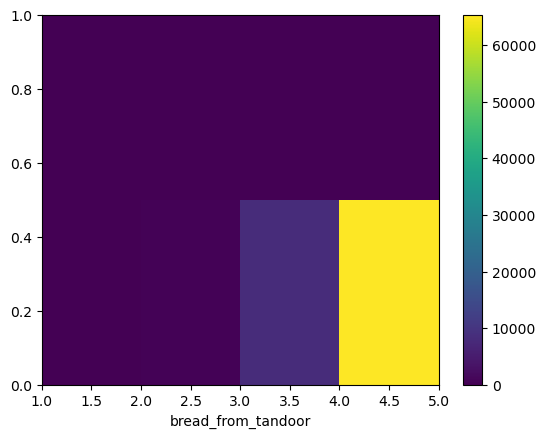

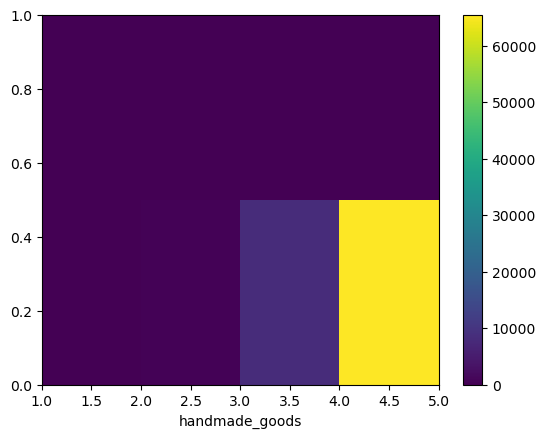

In [10]:
make_draw = True

food_gist_id = df_train_all.columns.get_loc("food_delivery")
len(df_train_all.columns)

for pos in range(food_gist_id, len(df_train_all.columns)):
    if not make_draw: continue
    columns_names_hist = ['rating_org', df_train_all.columns[pos]]
    curr_data_frame_hist = pd.DataFrame.from_records(df_train_all, columns=columns_names_hist)

    fig, ax = plt.subplots()
    ax.set_xlabel(df_train_all.columns[pos])

    h = ax.hist2d(curr_data_frame_hist['rating_org'], curr_data_frame_hist[df_train_all.columns[pos]],
                  bins=(4, 2))
    fig.colorbar(h[3], ax=ax)

    plt.show()